In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

file_to_load = "Resources/overdose-death-rates-per-population.csv"

# Read File and store into Pandas data frame
overdose_df = pd.read_csv(file_to_load,sep = ";")

overdose_df.head()


,Location,Year,All Drug Overdose Death Rate (Age-Adjusted),All Drug Overdose Death Rate (Age-Adjusted) (missing reason),Opioid Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted) (missing reason),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in All Drug Overdose Death Rate from Prior Year (missing reason),Percent Change in Opioid Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year (missing reason)
0,Maryland,2012,13.7,NaN,10.9,NaN,0.17,NaN,0.20,NaN
1,Arizona,2015,19.0,NaN,10.2,NaN,0.04,NaN,0.16,NaN
2,Vermont,2003,10.2,NaN,7.2,NaN,0.36,NaN,0.24,NaN
3,Kansas,2008,8.0,NaN,3.5,NaN,-0.20,NaN,-0.20,NaN
4,Idaho,2009,11.6,NaN,4.2,NaN,0.18,NaN,-0.13,NaN


In [2]:
overdose_df.count() 

Location                                                                           867
Year                                                                               867
All Drug Overdose Death Rate (Age-Adjusted)                                        858
All Drug Overdose Death Rate (Age-Adjusted) (missing reason)                         9
Opioid Overdose Death Rate (Age-Adjusted)                                          823
Opioid Overdose Death Rate (Age-Adjusted) (missing reason)                          44
Percent Change in All Drug Overdose Death Rate from Prior Year                     805
Percent Change in All Drug Overdose Death Rate from Prior Year (missing reason)     62
Percent Change in Opioid Overdose Death Rate from Prior Year                       767
Percent Change in Opioid Overdose Death Rate from Prior Year (missing reason)      100
dtype: int64

In [3]:
overdose_df.dtypes

Location                                                                            object
Year                                                                                 int64
All Drug Overdose Death Rate (Age-Adjusted)                                        float64
All Drug Overdose Death Rate (Age-Adjusted) (missing reason)                        object
Opioid Overdose Death Rate (Age-Adjusted)                                          float64
Opioid Overdose Death Rate (Age-Adjusted) (missing reason)                          object
Percent Change in All Drug Overdose Death Rate from Prior Year                     float64
Percent Change in All Drug Overdose Death Rate from Prior Year (missing reason)     object
Percent Change in Opioid Overdose Death Rate from Prior Year                       float64
Percent Change in Opioid Overdose Death Rate from Prior Year (missing reason)       object
dtype: object

# Statistics Analysis By States

In [4]:
#group data by states
grouped_overdose_bystate = overdose_df.groupby(["Location"])

In [5]:
#get a serie of average opioid overdose death rate 
ave_death_rate_opioid = grouped_overdose_bystate['Opioid Overdose Death Rate (Age-Adjusted)'].mean()
#ave_death_rate_opioid

In [6]:
#a serie of ave all drug overdose death rate 
ave_death_rate_drugs = grouped_overdose_bystate['All Drug Overdose Death Rate (Age-Adjusted)'].mean()
#ave_death_rate_drugs

In [7]:
# make a dataframe that contains all drugs and opioid ave death rates 
ave_death_rate_bystate_df = pd.DataFrame([ave_death_rate_drugs,ave_death_rate_opioid])

#switch rows and columns for the new dataframe
ave_death_rate_bystate_df = ave_death_rate_bystate_df.T


ave_death_rate_bystate_df.head()

,All Drug Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted)
Location,,
Alabama,9.464706,3.000000
Alaska,12.976471,8.736364
Arizona,14.870588,7.511765
Arkansas,10.000000,4.841176
California,9.364706,4.288235


In [ ]:
# to get a list of states (i.e., location) from the new dataframe
#reset_ave_death_rate_bystate_df = ave_death_rate_bystate_df.reset_index()
#list_of_states = list(reset_ave_death_rate_bystate_df['Location'])

# Bar Graph of death rates grouped by states

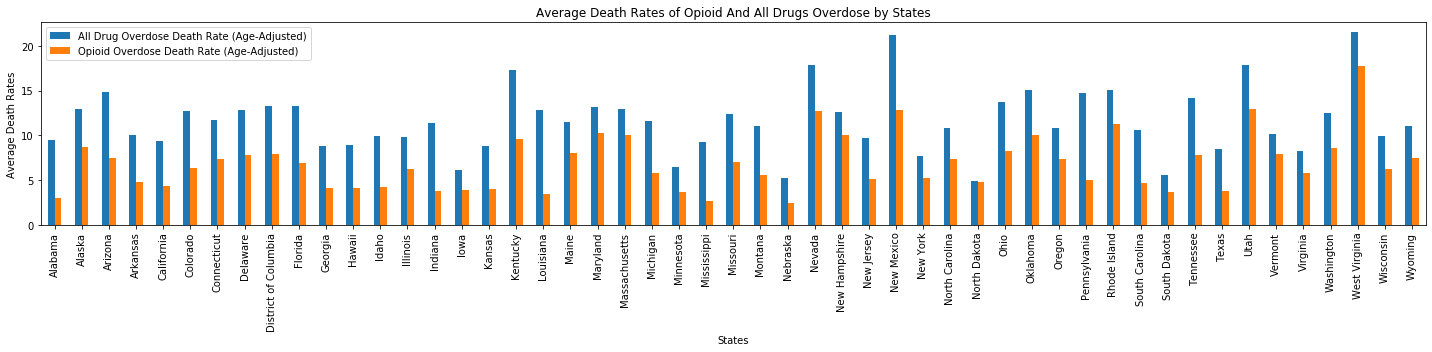

In [8]:
# Use DataFrame.plot() in order to create a bar chart of the data
# panda is using maplot underneath
ave_death_rate_bystate_df.plot(kind="bar", figsize=(20,5))

# Set a title and labels for the chart
plt.title("Average Death Rates of Opioid And All Drugs Overdose by States")
plt.xlabel("States")
plt.ylabel("Average Death Rates")
#display and show the figure
plt.tight_layout()
plt.savefig("images/bar_avg_death_rate_bystate.png")
plt.show()


# Regression of ave death rate between all drugs and opioid

In [9]:
# Run T test
(t_stat, p) = stats.ttest_ind(ave_death_rate_drugs, ave_death_rate_opioid, equal_var=False)
t_stat = round(t_stat,2)
print("t-statistics is {}.".format(t_stat))
print("p-value is {}.".format(p))

t-statistics is 7.11.
p-value is 1.89388524513236e-10.


In [10]:
print("---------------------------")
print("Summary:")
print(f"Since p-value{p}is way bigger than .5, there is no statistically significant difference between \
all drugs and opioid")
print("That is, based on this dataset, the death rate of all drugs overdose cannot be distinguished from \
the death rate of opioid overdose")
print("---------------------------")

---------------------------
Summary:
Since p-value1.89388524513236e-10is way bigger than .5, there is no statistically significant difference between all drugs and opioid
That is, based on this dataset, the death rate of all drugs overdose cannot be distinguished from the death rate of opioid overdose
---------------------------


# Statistics Analysis By Years

In [11]:
grouped_overdose_byyear = overdose_df.groupby(["Year"])
grouped_overdose_byyear.count()

,Location,All Drug Overdose Death Rate (Age-Adjusted),All Drug Overdose Death Rate (Age-Adjusted) (missing reason),Opioid Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted) (missing reason),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in All Drug Overdose Death Rate from Prior Year (missing reason),Percent Change in Opioid Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year (missing reason)
Year,,,,,,,,,
1999,51,49,2,43,8,0,51,0,51
2000,51,50,1,44,7,49,2,43,8
2001,51,50,1,47,4,50,1,43,8
2002,51,50,1,47,4,50,1,47,4
2003,51,51,0,46,5,50,1,46,5
2004,51,50,1,48,3,50,1,46,5
2005,51,50,1,48,3,50,1,48,3
2006,51,50,1,49,2,50,1,48,3
2007,51,51,0,49,2,50,1,48,3


In [12]:
#get a serie of average opioid overdose death rate by year 
ave_death_rate_opioid_byyear = grouped_overdose_byyear['Opioid Overdose Death Rate (Age-Adjusted)'].mean()
#get a dataframe of ave opioid death rate by year
ave_death_rate_opioid_byyear_df = pd.DataFrame(ave_death_rate_opioid_byyear)
ave_death_rate_opioid_byyear_df = ave_death_rate_opioid_byyear_df.reset_index()



In [13]:
#to get a list of years 
list_of_year = list(ave_death_rate_opioid_byyear_df['Year'])

# Scatterplot for Ave Death Rate of Opioid Overdose

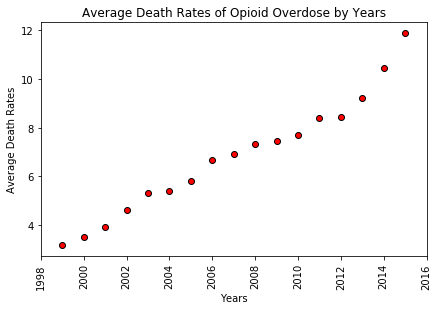

In [14]:
#to create a scatter plot 

plt.scatter(list_of_year, ave_death_rate_opioid_byyear, marker="o", facecolors="red", edgecolors="black")
# Tell matplotlib where we would like to place each of our x axis headers
x_axis = np.arange(len(ave_death_rate_opioid_byyear))
#===========================================
#random draft
#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, list_of_year,rotation=90)
#===========================================
plt.xticks(rotation=90)
plt.xlim(1998,2016)
plt.tight_layout()
plt.title("Average Death Rates of Opioid Overdose by Years")
plt.xlabel("Years")
plt.ylabel("Average Death Rates")
plt.savefig("images/scatter_avg_death_rate_opioid_byyear.png")
plt.show()

In [19]:
overdose_df["Percent Change in Opioid Overdose Death Rate from Prior Year"].describe()

count    767.000000
mean       0.127353
std        0.318005
min       -0.820000
25%       -0.030000
50%        0.080000
75%        0.220000
max        5.000000
Name: Percent Change in Opioid Overdose Death Rate from Prior Year, dtype: float64